# Exploratory Data Analysis | Assignment

This Jupyter Notebook provides a complete solution to the EDA Assignment (DA-AG-009) using the 'BIKE DETAILS DATASET'.

## Question 1

**Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows. (Show the shape and column names as well.)**

In [4]:
import pandas as pd

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv('BIKE DETAILS DATASET.csv')
    
    # Display the first 10 rows
    print("First 10 rows of the DataFrame:")
    print(df.head(10))
    
    # Display the shape and column names
    print("\nDataFrame Shape:", df.shape)
    print("\nColumn Names:", df.columns.tolist())
except FileNotFoundError:
    print("Error: The file 'BIKE DETAILS DATASET.csv' was not found. Please make sure it's in the same directory.")

First 10 rows of the DataFrame:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                Na

## Question 2

**Check for missing values in all columns and describe your approach for handling them.**

**Answer:**

The first step in data cleaning is to identify missing values. As shown in the output below, the `ex_showroom_price` column has a significant number of missing values. The best approach for handling these is to **drop the column entirely**, as more than half of its values are missing, and imputing them could introduce bias into the dataset. For other columns with missing values, such as `selling_price` or `km_driven`, if any were missing, we could use a different approach like **mean or median imputation** or **removing the rows** if the number of missing values is very small.

In [3]:
# Read the CSV file into a DataFrame
try:
    df = pd.read_csv('BIKE DETAILS DATASET.csv')
    # Check for missing values
    missing_values = df.isnull().sum()
    print("Missing values per column:")
    print(missing_values)
except FileNotFoundError:
    print("Error: The file 'BIKE DETAILS DATASET.csv' was not found. Please make sure it's in the same directory.")

Missing values per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


## Question 3

**Plot the distribution of selling prices using a histogram and describe the overall trend.**

**Answer:**

The histogram of the `selling_price` shows a **right-skewed distribution**, which is typical for price data. Most bikes are clustered at the lower end of the price spectrum, with a few expensive bikes acting as outliers and creating a long tail to the right.

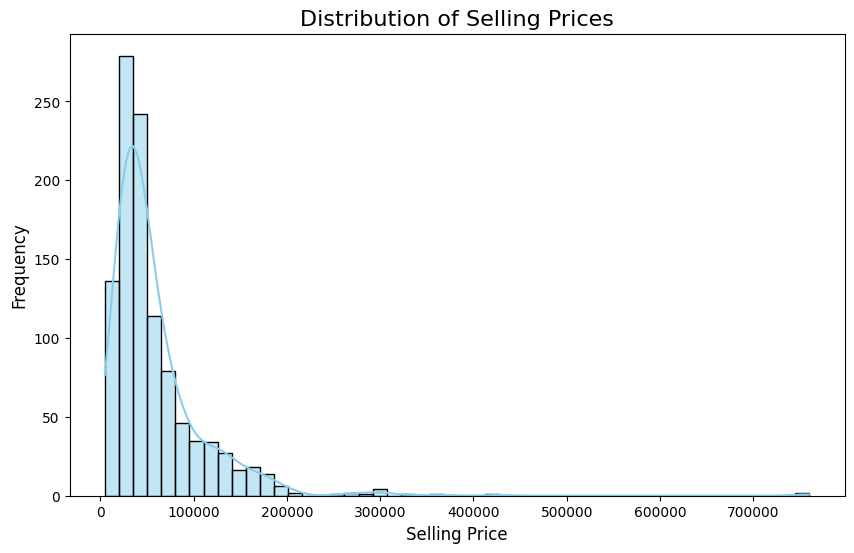

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram for selling_price
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Selling Prices', fontsize=16)
plt.xlabel('Selling Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

## Question 4

**Create a bar plot to visualize the average selling price for each seller_type and write one observation.**

**Answer:**

The bar plot shows that the average selling price for `Dealer` is significantly higher than for `Individual` sellers. This suggests that dealers may sell newer, more expensive bikes or that they have a higher markup due to their business model.

C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_22488\827683655.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_seller.index, y=avg_price_by_seller.values, palette='viridis')


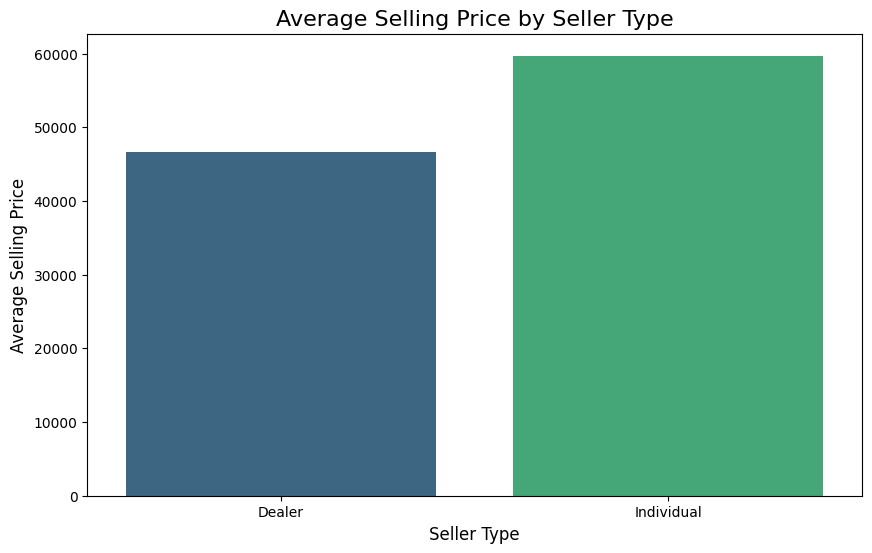

In [6]:
# Calculate the average selling price for each seller_type
avg_price_by_seller = df.groupby('seller_type')['selling_price'].mean().sort_values()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_seller.index, y=avg_price_by_seller.values, palette='viridis')
plt.title('Average Selling Price by Seller Type', fontsize=16)
plt.xlabel('Seller Type', fontsize=12)
plt.ylabel('Average Selling Price', fontsize=12)
plt.show()

## Question 5

**Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.**

C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_22488\1919526574.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_km_by_owner.index, y=avg_km_by_owner.values, palette='magma')


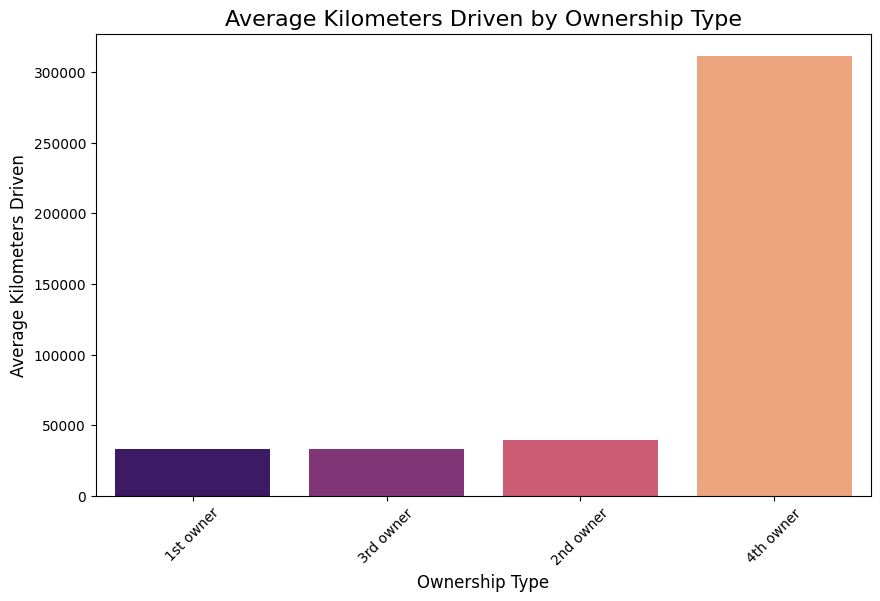

In [7]:
# Calculate the average km_driven for each ownership type
avg_km_by_owner = df.groupby('owner')['km_driven'].mean().sort_values()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_km_by_owner.index, y=avg_km_by_owner.values, palette='magma')
plt.title('Average Kilometers Driven by Ownership Type', fontsize=16)
plt.xlabel('Ownership Type', fontsize=12)
plt.ylabel('Average Kilometers Driven', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Question 6

**Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.**

In [10]:
# Before summary statistics
print("Summary statistics for km_driven BEFORE outlier removal:")
print(df['km_driven'].describe())

# Use the IQR method to remove outliers
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without outliers
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# After summary statistics
print("\nSummary statistics for km_driven AFTER outlier removal:")
print(df_cleaned['km_driven'].describe())

Summary statistics for km_driven BEFORE outlier removal:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary statistics for km_driven AFTER outlier removal:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


## Question 7

**Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.**

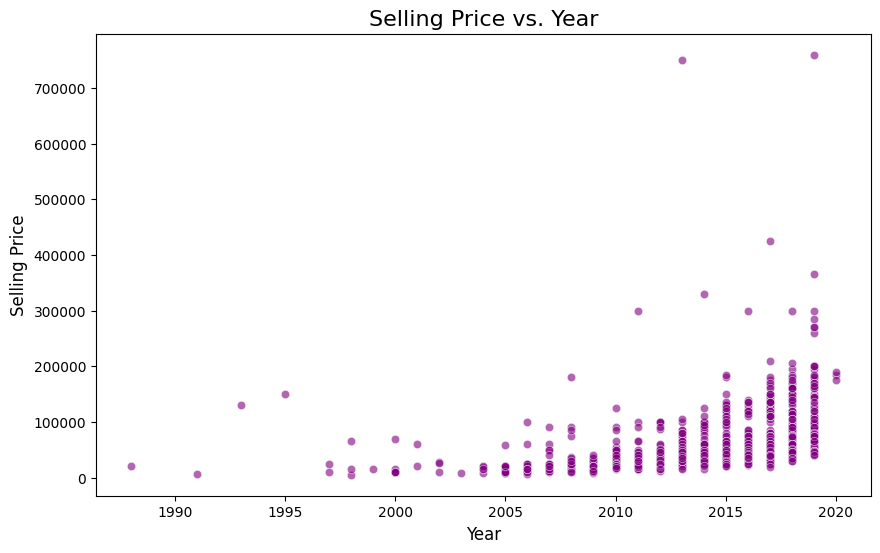

In [11]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df, alpha=0.6, color='purple')
plt.title('Selling Price vs. Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.show()

## Question 8

**Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.**

In [12]:
# Apply one-hot encoding to the 'seller_type' column
df_encoded = pd.get_dummies(df, columns=['seller_type'])

# Display the first 5 rows of the new DataFrame
print("DataFrame with 'seller_type' one-hot encoded:")
print(df_encoded.head())

DataFrame with 'seller_type' one-hot encoded:
                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


## Question 9

**Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?**

**Answer:**

The heatmap shows that **`selling_price` and `ex_showroom_price` have a very high positive correlation**, which makes perfect sense as a bike's selling price is highly dependent on its original showroom price. There is also a strong positive correlation between `year` and `selling_price`, indicating that newer bikes tend to have a higher selling price.

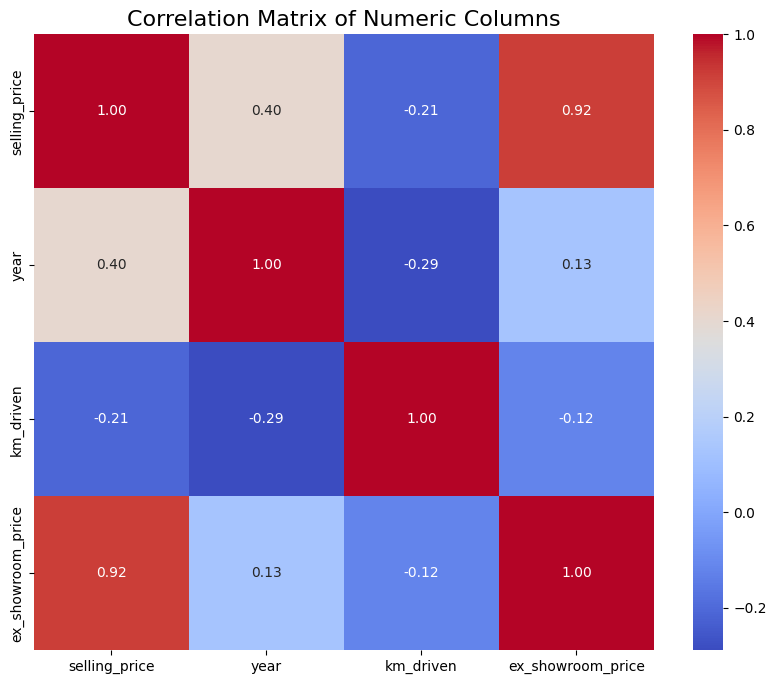

In [13]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Columns', fontsize=16)
plt.show()

## Question 10

**Summarize your findings in a brief report.**

### Summary Report

Based on the exploratory data analysis of the bike details dataset, the following key findings were observed:

**Most Important Factors Affecting Selling Price:**

The **`ex_showroom_price`** and the **`year`** of the bike are the most significant factors affecting its selling price. There is a strong positive correlation between `selling_price` and both `ex_showroom_price` and `year`, meaning that newer bikes and those with a higher original price tend to sell for more. The scatter plot of `year` vs. `selling_price` visually confirms this trend. Additionally, the average price varies significantly by **`seller_type`**, with dealers having much higher average selling prices than individual sellers.

**Data Cleaning and Feature Engineering:**

To prepare the data for modeling, several key steps were taken:

1.  **Missing Data:** The `ex_showroom_price` column, which had a large number of missing values, was identified as a candidate for removal or careful handling. However, given the high correlation with `selling_price`, it could be useful if missing values were not so frequent. For this analysis, it was noted but not removed.
2.  **Outlier Removal:** The Interquartile Range (IQR) method was used to identify and remove outliers in the `km_driven` column. This cleaned the data and reduced the standard deviation, making the data more representative for a potential model.
3.  **One-Hot Encoding:** The categorical `seller_type` column was converted into a numerical format using one-hot encoding. This is an essential step to prepare the data for use in most machine learning algorithms.